In [12]:
# file_name = '../run_nx_graph.log'

# file_name = '../train_nx_graph_decoder_big.log'

file_name = '../trained_results/nxgraph_big_proper_001/big_new_edge_features.log'

In [19]:
import time
time_format = '%d %b %Y %H:%M:%S'

get2nd = lambda x: x.split()[1]

time_info = []
data_info = []
itime = -1
with open(file_name) as f:
    for line in f:
        if line[0] != '#':
            tt = time.strptime(line[:-1], time_format)
            time_info.append(tt)
            data_info.append([])
            itime += 1
        else:
            items = line.split(',')
            try:
                iteration = int(get2nd(items[0]))
            except ValueError:
                continue
            time_consumption = float(get2nd(items[1]))
            loss_train = float(get2nd(items[2]))
            loss_test  = float(get2nd(items[3]))
            precision  = float(get2nd(items[4]))
            recall     = float(get2nd(items[5]))
            data_info[itime].append([iteration, time_consumption, loss_train,
                                  loss_test, precision, recall
                                 ])

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_info(info, name):
    if type(info) is not 'numpy.ndarray':
        info = np.array(info)
    df = pd.DataFrame(info, columns=['iteration', 'time', 'loss_train', 'loss_test', 'precision', 'recall'])
    
    # make plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
    axs = axs.flatten()
    
    ax = axs[0]
    df.plot(x='iteration', y='time', ax=ax)
    ratio = df['time'][0]/df['iteration'][0]
    ax.plot(df['iteration'], df['iteration']*ratio, label='projection')
    ax.legend()
    
    ax = axs[1]
    df.plot(x='iteration', y='loss_train', ax=ax)
    df.plot(x='iteration', y='loss_test', ax=ax)
    ax.plot(df['iteration'], [0.1]*df['iteration'].shape[0])
    
    ax = axs[2]
    df.plot(x='iteration', y='precision', ax=ax)
    ax.plot(df['iteration'], [0.95]*df['iteration'].shape[0])
#     ax.set_ylim(0.5, 1.02)
    
    ax = axs[3]
    df.plot(x='iteration', y='recall', ax=ax)
    ax.plot(df['iteration'], [0.95]*df['iteration'].shape[0])
#     ax.set_ylim(0.5, 1.02)
    
    fig.suptitle(name, fontsize=16)
    return df

### run_nx_graph.log
No sigmoid in the output transformation.

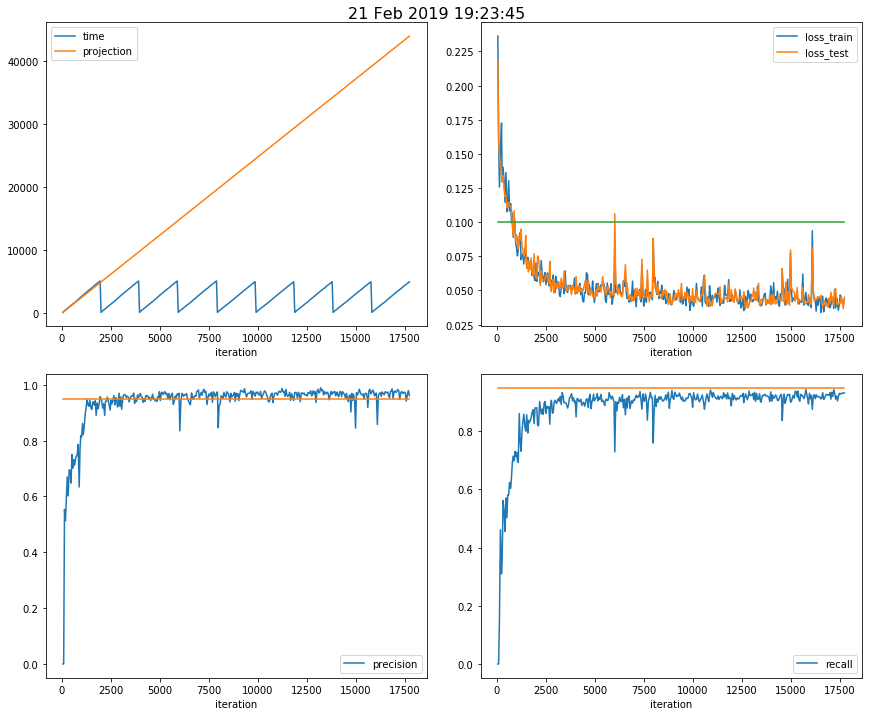

In [20]:
itime = 0
df_info = plot_info(data_info[itime], time.strftime(time_format, time_info[itime]))

### Training results from train_nx_graph.log
The model is with the output transformation function changed to mlp[Latent-size/2, 1] + sigmoid, comparing to previous one

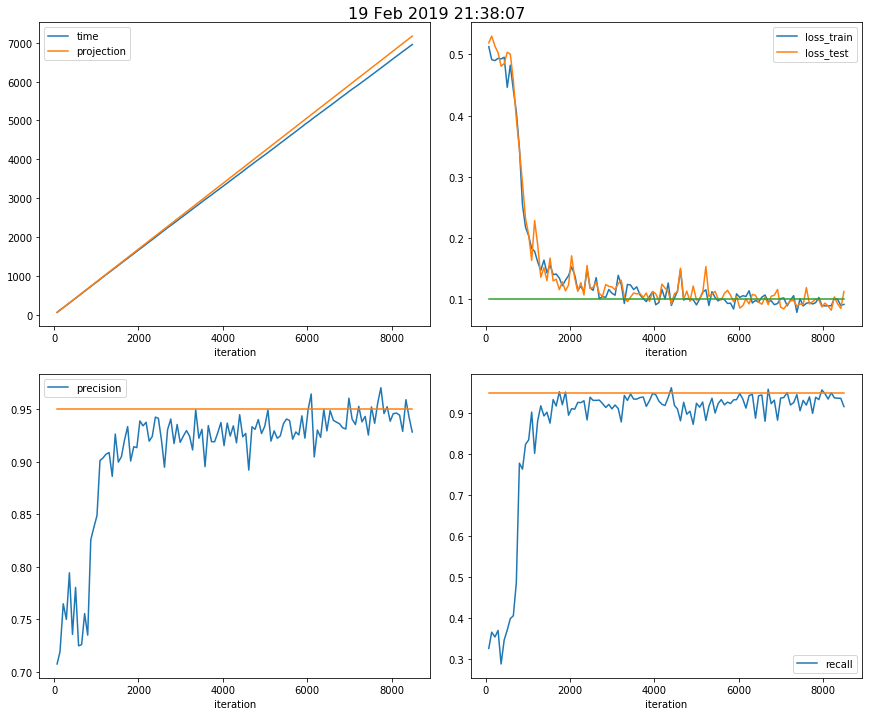

In [8]:
itime = 0
df_info = plot_info(data_info[itime], time.strftime(time_format, time_info[itime]))

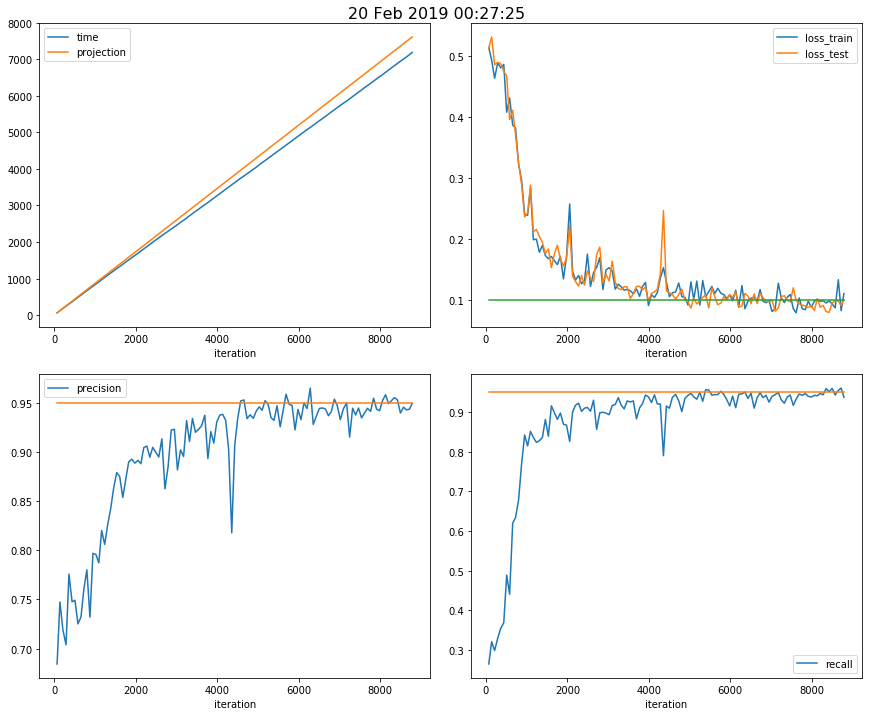

In [11]:
itime = 0
df_info = plot_info(data_info[itime], time.strftime(time_format, time_info[itime]))

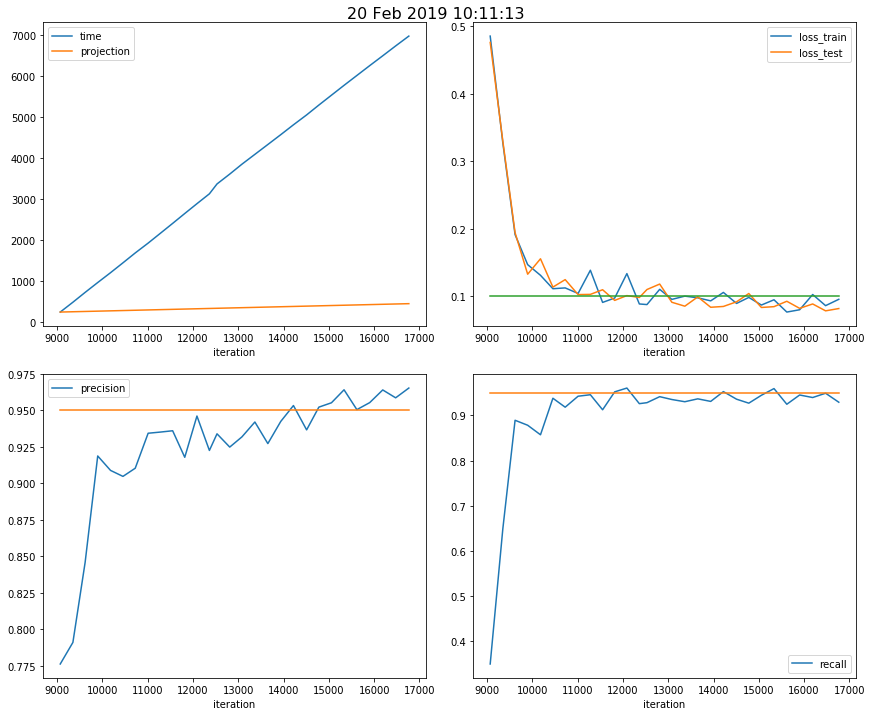

In [13]:
itime = 1
df_info = plot_info(data_info[itime], time.strftime(time_format, time_info[itime]))

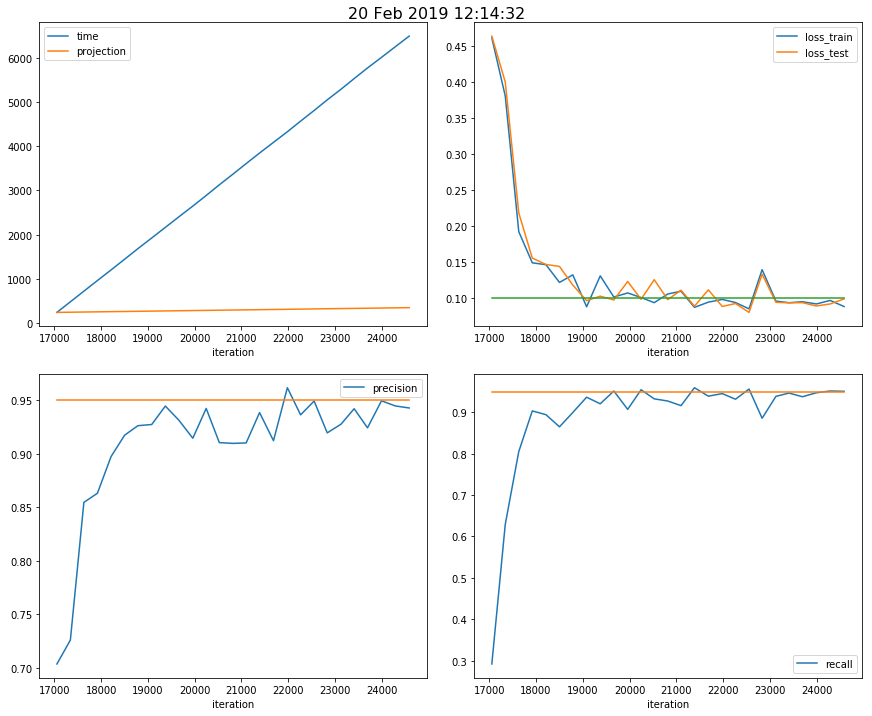

In [15]:
itime = 2
df_info = plot_info(data_info[itime], time.strftime(time_format, time_info[itime]))

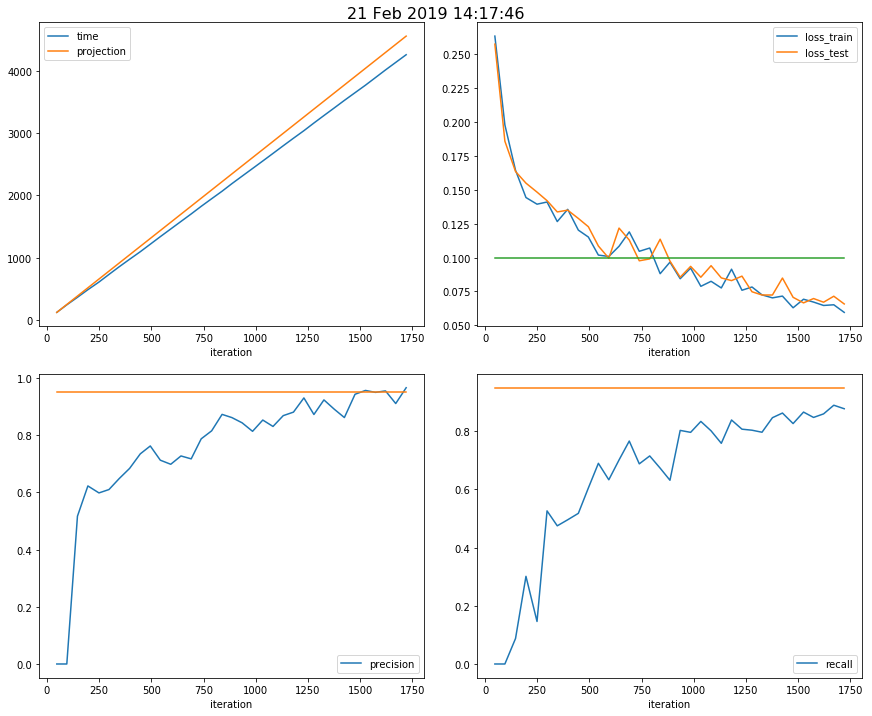

In [38]:
itime = 0
df_info = plot_info(data_info[itime], time.strftime(time_format, time_info[itime]))